In [1]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
df = pd.read_csv("HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.drop_duplicates(keep='first', inplace=True)

In [5]:
df.columns=[i.lower().strip() for i in df.columns]
for i in df.columns:
    print(i)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
work_accident
left
promotion_last_5years
departments
salary


In [6]:
salary_map = {'high': '3', 'medium': '2' , 'low': '1'}
df['salary']=df['salary'].map(salary_map)
df['salary']=df['salary'].astype('int')

In [7]:
department_map = {'sales': '1', 'technical': '2' , 'support': '3','IT': '4', 'RandD': '5' , 'product_mng': '6','marketing': '7', 'accounting': '8' , 'hr': '9', 'management': '10'}
df['departments']=df['departments'].map(department_map)
df['departments']=df['departments'].astype('int')

In [8]:
# normalize
#df = (df - np.min(df)) / (np.max(df) - np.min(df)).values
#df.head()

In [9]:
real_test_data = df.sample(1991)

X_real_test = real_test_data.drop('left',axis=1)

y_real_test = real_test_data['left']

In [10]:
print('X_real_test :',X_real_test.shape)
print('y_real_test :',y_real_test.shape)

X_real_test : (1991, 9)
y_real_test : (1991,)


In [11]:
drop_index = real_test_data.index
df = df.drop(drop_index)

In [12]:
X = df.drop('left',axis=1)
y = df['left']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)

In [14]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (8000, 9)
X_test : (2000, 9)
y_train : (8000,)
y_test : (2000,)


# Random Forest Classifier

In [15]:
RF_model = RandomForestClassifier(random_state=101)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [18]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[1642    8]
 [  31  319]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1650
           1       0.98      0.91      0.94       350

    accuracy                           0.98      2000
   macro avg       0.98      0.95      0.97      2000
weighted avg       0.98      0.98      0.98      2000


Train_Set
[[6682    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6682
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



# Save & Load Test Model

In [19]:
# save
joblib.dump(RF_model, "model_rfc_churn.joblib")

# load
loaded_rf = joblib.load("model_rfc_churn.joblib")

In [20]:
# Test data
y_real_pred = loaded_rf.predict(X_real_test)

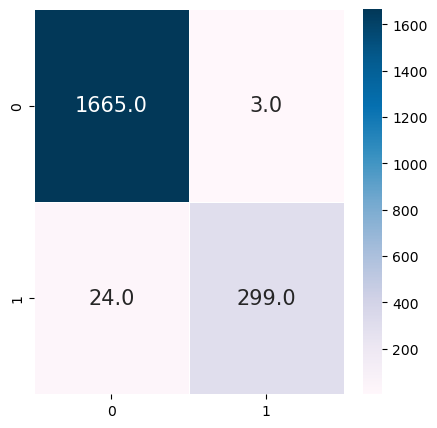

In [21]:
# Cofusion Matrix
plt.rcParams['figure.dpi'] = 100
cm = confusion_matrix(y_real_test, y_real_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',linewidths=.5,fmt=".1f");

In [22]:
 print(classification_report(y_real_test, y_real_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1668
           1       0.99      0.93      0.96       323

    accuracy                           0.99      1991
   macro avg       0.99      0.96      0.97      1991
weighted avg       0.99      0.99      0.99      1991

